# scaling and matching （used to wavelength calibration）

In [13]:
from scipy.optimize import minimize
import numpy as np 
from functools import partial 

def chi2model(coeff, x, y):
    y_predict = np.polyval(coeff, x)
    chi2 = np.sum((y - y_predict) ** 2)
    return chi2
x_ini=np.array([0.0,0.0])#x初始值的类型为数组类型

x=np.array([1.0,2.0,3.0,4.0,5.0])#x的值
y=np.array([2.0,3.0,4.0,5.0,6.0])#y的值
res=minimize(chi2model, x_ini, bounds=((-10,10),(-10,10)), args = (x,y)) 
print('initial guess coeffs: ', x_ini)
print('optimized coeffs: ', res.x)

initial guess coeffs:  [0. 0.]
optimized coeffs:  [1. 1.]


initial guess coeffs:  [0, 0.10300000000000002, 0.463]
optimized coeffs:  [0.00299952 0.08000332 0.49999642]


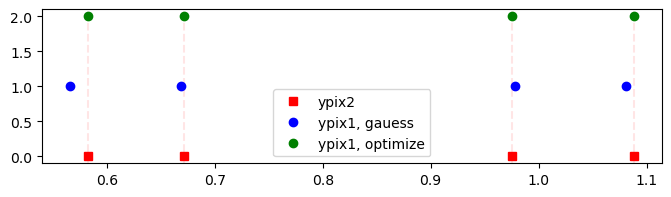

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize


ypix1   = np.array([1, 2, 5, 6])
ypix2   = 0.003*ypix1**2 + 0.08*ypix1 + 0.5 # + np.random.normal(0, 0.1, len(ypix1))
def chi2model1(coeff, y1, y2): 
    y1_predict = np.polyval(coeff, y1) 
    mat = (y2[:, np.newaxis] - y1_predict)**2
    argmin = np.argmin(mat, axis=1) 
    chi2   = 0.0  
    for i, iarg in enumerate(argmin): chi2 += mat[i, iarg]
    return chi2
def initial_guess(y1, y2): 
    b = np.median( np.gradient(y2) ) / np.median( np.gradient(y1) )
    c = np.median(y2) - b * np.median(y1) 
    return [0, b, c]
b = np.median( np.gradient(ypix2) ) / np.median( np.gradient(ypix1) )
c = np.median(ypix2) - b * np.median(ypix1) 
x_ini = initial_guess(ypix1, ypix2) 
res=minimize(chi2model1, x_ini, bounds=((-b,b), (0,np.inf),(0,np.inf)), args = (ypix1,ypix2)) 
print('initial guess coeffs: ', x_ini)
print('optimized coeffs: ', res.x)

plt.figure(figsize=(8,2)) 
plt.plot(ypix2, np.zeros_like(ypix2), 'rs', label='ypix2')
for ypix2_ in ypix2: plt.axvline(ypix2_, color='r', alpha=0.1, ls = 'dashed') 
plt.plot(np.polyval(x_ini, ypix1), np.zeros_like(ypix1) + 1, 'bo', label='ypix1, gauess')
plt.plot(np.polyval(res.x, ypix1), np.zeros_like(ypix1) + 2, 'go', label='ypix1, optimize')
plt.legend() 